In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sqlite3 
plt.style.use('seaborn')
import scipy.stats as stats
import math
np.random.seed(0)

In [73]:
# connect database and create cursor here
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()


In [82]:
c.execute("""SELECT score FROM reviews JOIN genres USING (reviewid);""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data.head(3)
data.describe()

,score
count,22690.000000
mean,6.991155
std,1.305532
min,0.000000
25%,6.400000
50%,7.200000
75%,7.800000
max,10.000000


In [ ]:
plt.figure(figsize = (5,5))
plt.hist(data.score, bins = 20);

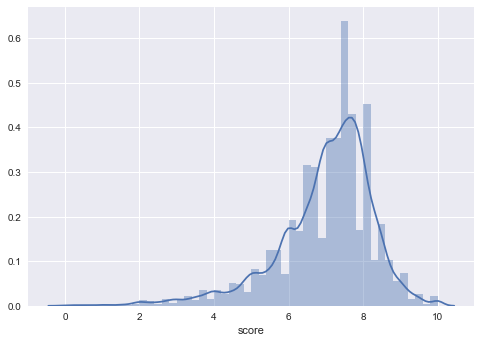

In [76]:
sns.distplot(data.score);

In [77]:
# stat.normaltest(data.score)

In [78]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    return sample

def get_sample_mean(sample):
    return sum(sample)/len(sample)

def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

numpy.ndarray

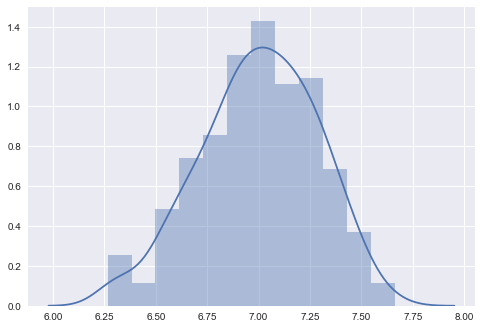

In [79]:
pop_score = np.array(data.score)
population = create_sample_distribution(pop_score, dist_size=300, n=20)

sns.distplot(population)
type(pop_score)


In [80]:
pop_mean = np.mean(population)
pop_std = np.std(population)
print("Population Mean:", pop_mean)
print("Population Standard Deviation", pop_std)


Population Mean: 7.00035
Population Standard Deviation 0.2825540553003384


In [81]:
# c.execute("""SELECT content from content ;""")
# data = pd.DataFrame(c.fetchall())
# data.columns = [x[0] for x in c.description]
# data.head()
# len_content = data.applymap(lambda i: len(i))
# # print(len_content)
# type(len_content)
# len_content.describe()


# (data.iloc[0])

# c.execute("""SELECT genre from genres ;""")
# data = pd.DataFrame(c.fetchall())
# data.columns = [x[0] for x in c.description]
# data.genre.value_counts()

# c.execute("""SELECT author_type from reviews ;""")
# data = pd.DataFrame(c.fetchall())
# data.columns = [x[0] for x in c.description]
# data.author_type.value_counts()

## JAZZ DATA##

In [88]:
c.execute("""SELECT score FROM reviews JOIN genres using (reviewid)  WHERE genre ==  'jazz' ;""")
jazz_data = pd.DataFrame(c.fetchall())
jazz_data.columns = [x[0] for x in c.description]
jazz_data.describe()

,score
count,435.000000
mean,7.303908
std,1.251104
min,1.000000
25%,6.900000
50%,7.600000
75%,8.000000
max,10.000000


Lenght of Jazz Data: 435


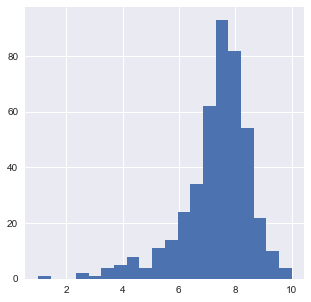

In [92]:
plt.figure(figsize = (5,5))
plt.hist(jazz_data.score, bins = 20);
print('Lenght of Jazz Data:', len(jazz_data))

In [45]:
jazz_population = create_sample_distribution(np.array(jazz_data.score), dist_size=300, n=20)
jazz_mean = np.mean(jazz_population)
jazz_std = np.std(jazz_population)
print("Jazz Mean:", jazz_mean)
print("Jazz Standard Deviation", jazz_std)

Jazz Mean: 6.949283333333335
Jazz Standard Deviation 0.2986202768102364


## METAL DATA

In [93]:
c.execute("""SELECT score FROM reviews JOIN genres using (reviewid)  WHERE genre ==  'metal' ;""")
metal_data = pd.DataFrame(c.fetchall())
metal_data.columns = [x[0] for x in c.description]
metal_data.describe()

,score
count,862.000000
mean,6.950000
std,1.387799
min,0.200000
25%,6.500000
50%,7.300000
75%,7.900000
max,9.700000


Lenght of Metal Data: 862


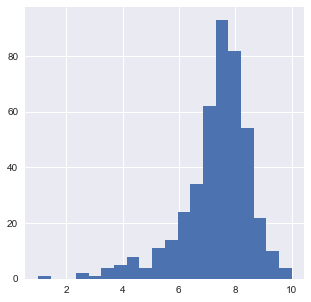

In [95]:
plt.figure(figsize = (5,5))
plt.hist(jazz_data.score, bins = 20);
print('Lenght of Metal Data:', len(metal_data))

In [50]:
metal_population = create_sample_distribution(np.array(metal_data.score), dist_size=300, n=20)
metal_mean = np.mean(metal_population)
metal_std = np.std(metal_population)
print("Metal Mean:", metal_mean)
print("Metal Standard Deviation", metal_std)

Jazz Mean: 6.915666666666666
Jazz Standard Deviation 0.32454643564348207


## TWO SAMPLE T-TEST

Null Hypothesis(Ho): There is no significant difference between mean values of jazz and metal data set.
Alternative Hypothesis(Ha): There is a significant difference between jazz and metal mean values.

In [97]:
results = stats.ttest_ind(metal_population, jazz_population)

print('Difference Between Mean Values:', jazz_mean - metal_mean)
print ("The t-value for sample is", np.round(results[0], 2), "and the p-value is", np.round((results[1]), 4))

                          

Difference Between Mean Values: 0.03361666666666885
The t-value for sample is -1.32 and the p-value is 0.188


In [98]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=19),3)
print('T-Critical Value:', t_crit)

if (results[0]>t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4))
else:
    print ("Null hypothesis is Accepted")

T-Critical Value: 1.729
Null hypothesis is Accepted


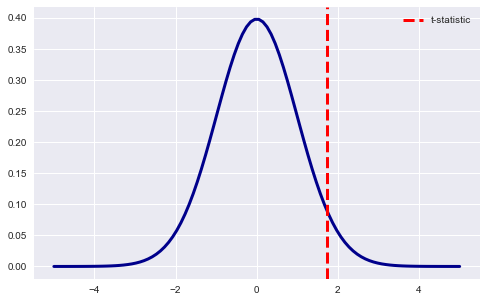

In [113]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 100)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, 100, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_crit, color='red', linestyle='--', lw=3,label='t-statistic')
ax.legend()
plt.show()